# Exploring The Most Popular Songs On Spotify In America, In 2020 #

This dataset represents the top 50 most popular songs on Spotify in America in 2020, as measured by Spotify and released to the public via an [ordered playlist](https://open.spotify.com/user/spotify/playlist/37i9dQZF1DXaqCgtv7ZR3L?si=K4BLJsyXSy-j0cSED9FjgQ) at the end of the year . Spotify maintains a large amounts of track-level data for songs on the platform, including both objective measures (i.e. duration of song) and Spotify-defined metrics created using machine learning functions (i.e. danceability). The below dataset was acquired using Spotipy, a package which allows one to work with Spotify's API to gather such track-level data. 

My notebook which used Spotipy to gather the dataset is titled "Spotify Initial Data Collection.ipynb"; it is also in the data_analysis folder. In this notebook, I will call upon the already-developed dataset and begin cleaning and examining the dataset. 

Source: Spotify Web API, [Spotify Top Tracks of 2020 USA](https://open.spotify.com/user/spotify/playlist/37i9dQZF1DXaqCgtv7ZR3L?si=eAq2hBqrTR-s5M99y-vQeQ)

Downloaded: 11/14/2021

Srinidhi Ramakrishna

In [1]:
import pandas as pd

In [2]:
spotifytop2020 = pd.read_csv("../data/Clean/spotifytop2020cleaned.csv")

### Data Exploration and Analysis ###

In [3]:
spotifytop2020['artist'].value_counts().head(10)

Juice WRLD       7
Travis Scott     3
Roddy Ricch      2
Harry Styles     2
Lewis Capaldi    2
Drake            2
Jack Harlow      2
Post Malone      2
DaBaby           2
NLE Choppa       1
Name: artist, dtype: int64

Here, I observe that certain artists (namely Juice WRLD, Travis Scott, and others) have outsize representation in this dataset - in other words, they had multiple tracks make it to the top 50 most-streamed tracks in the US on Spotify.

In [4]:
keycols = ['danceability', 'acousticness', 'energy', 'speechiness', 'valence']

round(spotifytop2020[keycols].mean(), 3)

danceability    0.729
acousticness    0.239
energy          0.600
speechiness     0.130
valence         0.508
dtype: float64

Here, I take the mean of a variety of the most important columns. For example, the mean energy of the top 50 most popular songs on Spotify in the US in 2020 was 0.6 out of 1. These will likely only become truly useful when placed in comparison to similar means from a dataset measuring songs popular on Billboard. 

In [5]:
for i in keycols:
    print(i)
    print(spotifytop2020[spotifytop2020[i] == spotifytop2020[i].max()][['name']])

danceability
                              name
8  WAP (feat. Megan Thee Stallion)
acousticness
                   name
30  everything i wanted
energy
               name
7  Watermelon Sugar
speechiness
                         name
4  Life Is Good (feat. Drake)
valence
                                             name
19  Sunflower - Spider-Man: Into the Spider-Verse


Here, I display the songs which represent the maximum quantities of the same columns. For readability:   
- WAP is the song with the most danceability.
- everything I wanted is the song with the most acousticness.
- Watermelon Sugar is the song with the most energy.
- Life Is Good is the song with the most speechiness.
- Sunflower is the song with the most valence, or positiveness.

In [6]:
spotifytop2020['duration_sec'].mean()

197.94022

The mean duration of songs in this dataset is ~198 seconds (3:18). Let's visualize the distribution of song lengths in this dataset.

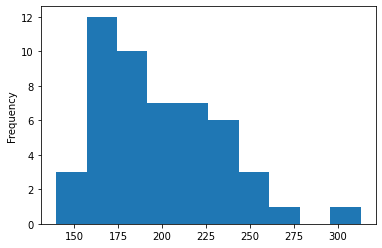

In [7]:
spotifytop2020['duration_sec'].plot(kind='hist', bins=10);

This plot shows that a majority of songs seem to cluster between 160 and 180 seconds (2:40 - 3 minutes). The distribution is negatively skewed. 

Let's make a similar plot which shows the distribution of danceability.

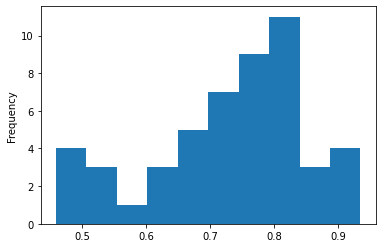

In [8]:
spotifytop2020['danceability'].plot(kind='hist', bins=10);

This distribution is positively skewed; the most songs cluster around the 0.8 mark of danceability.

Out of curiosity, I wonder how the explicit nature of a song would or would not impact some of these metrics.

In [9]:
spotifytop2020.groupby('explicit')[['energy','danceability']].mean()

,energy,danceability
explicit,,
False,0.564750,0.678687
True,0.617176,0.753088


Interesting! This offers support to the idea that explicit songs are associated with higher energy and danceability than non-explicit songs. 

After exploring this data, I have noticed that the Spotify data, in and of itself, is fairly clear. The main question I need to ponder over is the relevance of the ranking. Since these songs are already the most popular among a huge population, it does not seem as if the ranking (i.e. the 5th most popular vs the 11th) will yield any major differences in the corresponding metrics like energy, danceability, loudness, etc. Indeed, my exploratory line graphs attempting to index by ranking yielded no useful information. However, it is possible ranking will be useful when comparing performances of the same song across Spotify and Billboard charts, or when conducting case studies.

Still, not much relevant information can be learned from the Spotify data alone beyond simple statistical observations. Our next priority now is therefore figuring out a way to look at both the Spotify and Billboard data to make meaningful comparisons by gathering the same metrics via Spotipy for songs which have charted on Billboard. 